# Read and plot data

In [2]:
# netcdf/numpy/xray/stats
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import xarray as xr
from scipy.stats.stats import pearsonr

# OS interaction
import sys
import pickle
import os
import gzip

# import plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import kgraph

# Offline Turbulence Package
import turbpy

# Customize
sns.set_style("whitegrid")
sns.set_context('paper')
%matplotlib inline

In [67]:
# --------------------------------------------------------------------------------------------------------------------
# Directory Lists
# Unix

dirProj = '/Users/karllapo/Desktop/Documents/Software/bmmflux/'
dirPrint = dirProj + 'python_processing/quicklooks_stats/plots/py_plots'
dirData = dirProj + 'python_processing/quicklooks_stats/input'


In [69]:
# --------------------------------------------------------------------------------------------------------------------
# Units dictionary
units_dict = {'speed': '(m s$^{-1}$)',
              'energy': '(Wm$^{-2}$)',
              'temp_C': '($^{\circ} C$)',
              '-': '(unitless)',
             }

## Land station

In [61]:
os.chdir(dirData + '/land_station')

# Function to parse the date column within read_csv
def dparse(y, mon, d, h, minute, s, ms):
    x = y + '/' + mon + '/' + d + ' ' + h + ':' + minute + ':' + s + '.' + ms
    d = pd.datetime.strptime(x, '%Y/%m/%d %H:%M:%S.%f')
    return d

# Decompress csv file, read it, and write the csv
with gzip.open('ExpMM2017_land_stats_10min_20172370830.csv.gz', 'rb') as f_in,\
    open('ExpMM2017_land_stats_10min_20172370830.csv', 'wb') as f_out:
        f_out.write( f_in.read()) 

# Read with pandas
land_stats = pd.read_csv('ExpMM2017_land_stats_10min_20172370830.csv', delimiter=',', skiprows=[0, 1],
                         parse_dates={'time':['#year#', '#MM#', '#DD#', '#hh#', '#min#', '#sec#', '#msec#']},
                         date_parser=dparse, header=0, index_col='time')


In [ ]:
# Some basic conversions/cleaning
import solargeo
land_stats

In [81]:
def quickplot(df, series, ax, units='-', **kwargs):
    ax.plot(df.index, df[series], label=series)
    ax.set_ylabel(units_dict[units])
    ax.legend(loc='best')

In [62]:
print(land_stats.columns)

Index(['S1_Ux_Avg', 'S1_Uy_Avg', 'S1_Uz_Avg', 'S1_Ts_Avg', 'S1_wnd_spd',
       'S1_wnd_dir_compass', 'S1_stddev_dir', 'S1_ANGLE_FROM_NORTH',
       'S1_incl_x_Avg', 'S1_incl_y_Avg', 'S2_Ux_Avg', 'S2_Uy_Avg', 'S2_Uz_Avg',
       'S2_Ts_Avg', 'S2_wnd_spd', 'S2_wnd_dir_compass', 'S2_stddev_dir',
       'S2_ANGLE_FROM_NORTH', 'co2_mmol_m3_Avg', 'h2o_mmol_m3_Avg',
       'press_li7500_Avg', 'diag_li7500_Max', 'Rswd_Avg', 'Rswu_Avg',
       'Rlwd_Avg', 'Rlwu_Avg', 'CNR1TC_Avg', 'NetRad_Avg', 'Albedo_Avg',
       'TT_1_Avg', 'FT_1_Avg', 'TT_2_Avg', 'FT_2_Avg', 'press_air_Avg',
       'AT_5cm_Avg', 'ST_1_Avg', 'ST_2_Avg', 'ST_3_Avg', 'ST_4_Avg',
       'ST_5_Avg', 'HFP_1_Avg', 'HFP_2_Avg', 'SM_1_Avg', 'SM_2_Avg',
       'SM_3_Avg', 'Batt_Volt_Avg', 'panel_temp_Avg'],
      dtype='object')


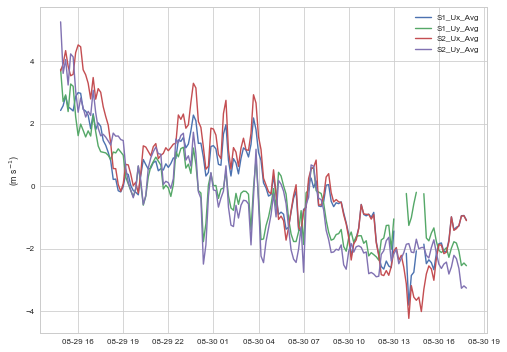

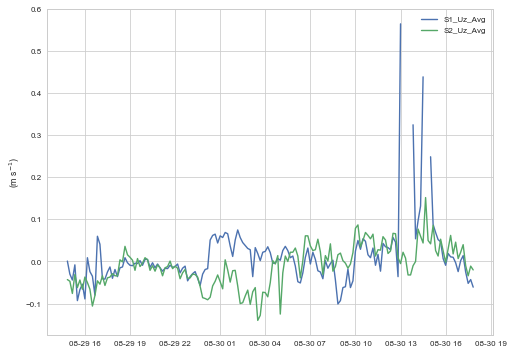

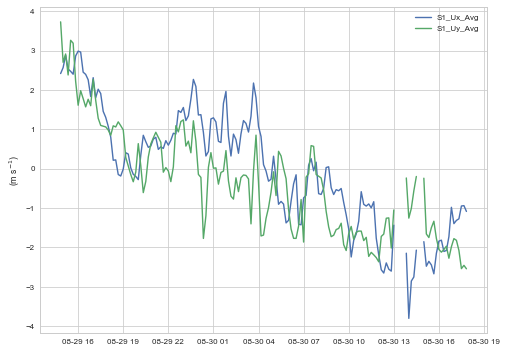

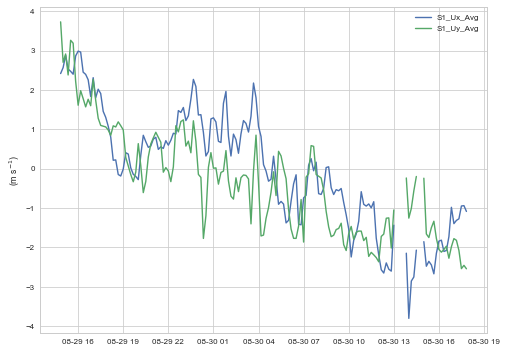

In [80]:
# Horizontal wind
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
quickplot(land_stats, 'S1_Ux_Avg', ax, 'speed')
quickplot(land_stats, 'S1_Uy_Avg', ax, 'speed')
quickplot(land_stats, 'S2_Ux_Avg', ax, 'speed')
quickplot(land_stats, 'S2_Uy_Avg', ax, 'speed')

# Vertical wind
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
quickplot(land_stats, 'S1_Uz_Avg', ax, 'speed')
quickplot(land_stats, 'S2_Uz_Avg', ax, 'speed')

# Radiative fluxes
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
quickplot(land_stats, 'NetRad_Avg', ax, 'energy')
quickplot(land_stats, 'Rlwu_Avg', ax, 'energy')
quickplot(land_stats, 'Rlwu_Avg', ax, 'energy')
quickplot(land_stats, 'Rlwu_Avg', ax, 'energy')

# Horizontal wind
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
quickplot(land_stats, 'S1_Ux_Avg', ax, 'speed')
quickplot(land_stats, 'S1_Uy_Avg', ax, 'speed')


In [75]:
land_stats.columns

Index(['S1_Ux_Avg', 'S1_Uy_Avg', 'S1_Uz_Avg', 'S1_Ts_Avg', 'S1_wnd_spd',
       'S1_wnd_dir_compass', 'S1_stddev_dir', 'S1_ANGLE_FROM_NORTH',
       'S1_incl_x_Avg', 'S1_incl_y_Avg', 'S2_Ux_Avg', 'S2_Uy_Avg', 'S2_Uz_Avg',
       'S2_Ts_Avg', 'S2_wnd_spd', 'S2_wnd_dir_compass', 'S2_stddev_dir',
       'S2_ANGLE_FROM_NORTH', 'co2_mmol_m3_Avg', 'h2o_mmol_m3_Avg',
       'press_li7500_Avg', 'diag_li7500_Max', 'Rswd_Avg', 'Rswu_Avg',
       'Rlwd_Avg', 'Rlwu_Avg', 'CNR1TC_Avg', 'NetRad_Avg', 'Albedo_Avg',
       'TT_1_Avg', 'FT_1_Avg', 'TT_2_Avg', 'FT_2_Avg', 'press_air_Avg',
       'AT_5cm_Avg', 'ST_1_Avg', 'ST_2_Avg', 'ST_3_Avg', 'ST_4_Avg',
       'ST_5_Avg', 'HFP_1_Avg', 'HFP_2_Avg', 'SM_1_Avg', 'SM_2_Avg',
       'SM_3_Avg', 'Batt_Volt_Avg', 'panel_temp_Avg'],
      dtype='object')